In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\artem\Downloads\intern_task.csv')
df.shape

(235258, 146)

In [3]:
df.head()

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
0,0,10,1.0,0.0,1.0,3.0,3.0,0.333333,0.0,0.333333,...,0.0,0.000000,0.454545,0.890238,8.655534,1.000000,0.077778,0.002222,1.0,0.333333
1,1,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.000000,0.773976,23.130514,0.000000,0.027826,0.000430,44.0,14.666667
2,0,10,3.0,0.0,2.0,0.0,3.0,1.000000,0.0,0.666667,...,0.0,0.000000,0.000000,0.918308,13.351339,0.000000,0.014925,0.000104,22.0,7.333333
3,1,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.000000,0.975355,18.240926,0.000000,0.053140,0.000255,8.0,2.666667
4,2,10,3.0,0.0,3.0,1.0,3.0,1.000000,0.0,1.000000,...,273.0,79.670665,0.200000,0.990119,31.786048,0.333333,0.046512,0.000307,24.0,8.000000


In [4]:
missing_values = df.isnull().sum()
missing_values #проверяем на пропуски

rank           0
query_id       0
feature_0      0
feature_1      0
feature_2      0
              ..
feature_139    0
feature_140    0
feature_141    0
feature_142    0
feature_143    0
Length: 146, dtype: int64

In [5]:
missing_values.mean()

0.0

In [6]:
df.select_dtypes('object').empty # нет категориальных значений

True

In [7]:
df.shape

(235258, 146)

In [8]:
df.describe() #смотрим на данные, видим выбросы, а это значит, что для лучшей дальнейшей работы мы должны будем их нормализованть

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
count,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,...,2.352580e+05,2.352580e+05,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000
mean,0.677869,14828.413401,1.911960,0.206233,1.189847,0.550272,1.960082,0.803964,0.097557,0.541174,...,4.763432e+02,1.046698e+04,0.070299,0.740710,11.067947,0.281747,0.027033,0.000269,22.457910,9.560379
std,0.830033,8193.945170,1.237374,0.579089,1.037233,0.790947,1.203534,0.339955,0.266035,0.419973,...,1.954840e+04,2.649584e+06,0.100721,0.352800,15.336861,0.392089,0.033351,0.002088,63.708018,14.347378
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8215.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.666667,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.620522,0.000000,0.000000,0.006703,0.000000,4.000000,2.000000
50%,0.000000,14935.000000,2.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.500000,...,0.000000e+00,0.000000e+00,0.000000,0.926779,9.448900,0.000000,0.017761,0.000008,12.000000,5.500000
75%,1.000000,21580.000000,3.000000,0.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,...,1.000000e+00,4.000000e-01,0.142857,0.999613,16.146733,0.500000,0.034954,0.000109,28.000000,12.000000
max,4.000000,29995.000000,31.000000,18.000000,27.000000,9.000000,31.000000,1.000000,1.000000,1.000000,...,1.731553e+06,8.000000e+08,0.818182,1.000000,2506.799764,1.000000,0.711261,0.250000,15074.000000,1552.000000


In [9]:
df = df[[c for c
        in list(df)
        if len(df[c].unique()) > 1]] #удаляем повторяющуюся информацию, так как она ничего не несет в себе

In [10]:
df.drop_duplicates(inplace=True) #удаляем еще и дубликаты, если они есть
df.shape

(235258, 142)

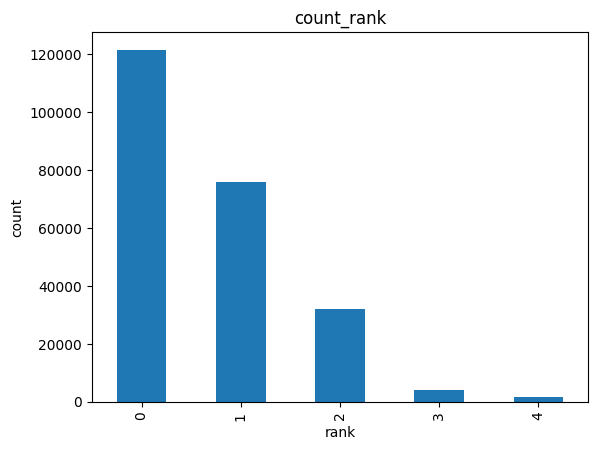

In [11]:
df['rank'].value_counts().plot(kind='bar')
plt.title('count_rank')
plt.xlabel('rank')
plt.ylabel('count')
plt.show() #смотри на распределения в данных и видим, что распределение разное

In [12]:
df['query_id'].nunique()

2000

In [13]:
shufle_df = df.sample(frac = 1) #перемешаем объекты

In [14]:
from sklearn.preprocessing import StandardScaler
X = shufle_df.drop(['rank'], axis=1)
y = shufle_df['rank']
scaler = StandardScaler()
scaler_X = scaler.fit_transform(X)
scaler_X = pd.DataFrame(scaler_X, columns=X.columns) #нормалтзуем данные используя StandartScaller

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(scaler_X , y, test_size = 0.25, random_state = 42)
#поделим на тестовую и тренировочную выборку

In [16]:
import xgboost as xgb
xgb1 = xgb.XGBClassifier() # инициализация xgboost
xgb1.fit(X_train, y_train); # обучаем на обучающей выборке

In [17]:
from sklearn.metrics import ndcg_score
ndcg_5 = ndcg_score(np.array([y_test]), np.array([xgb1.predict(X_test)]), k=5)
ndcg_5 # получаем хорошее качество модели


0.7672413793103448